<a href="https://colab.research.google.com/github/uomodellamansarda/DisneyMoviesAnalysis/blob/main/DisneyRevenuesStreamsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I analyzed the following dataset: 

https://data.world/kgarrett/disney-character-success-00-16

The dataset stores Disney characters, box office success & annual gross income. 

I made a first work evaluating if the dataset was missing relevant information or if between the three source there was any inconsistency . 

After this assessment, after I determinated the level of uncertainty related to the missing information, I identified the top 10 best selling films and the top 10 best selling directors and plotted.

It is very important to highlight that authors of the dataset do not explain how inflation adjusted gross is computed and which value was used.

In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 5)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#the url where the data are located 
url1="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_stream2016_2019.csv"
url2="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_1991-2016.csv"
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
#it's important to highlight that in 2015 and 2019 
#The Walt Disney Company Reports
df1=pd.read_csv(url1)
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
df2=pd.read_csv(url2)

In [5]:
#getting some information to understand 
#what kind of data cleaning work 
#I need to do
print('df1 info')
print(df1.info())
print('df2 info')
print(df2.info())


print('df1 head')
print(df1.head())
print('df2 head')
print(df2.head())


df1 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019        6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes
None
df2 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       26 non-null     float64
 2   Disney Consumer Products[NI 2]   26 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  26 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     floa

From this inspection I noticed that total_gross and inflation_adjusted_gross should be float and not object

In [21]:
#we have to fill the Nan with 0

df1=df1.fillna(0)
df2=df2.fillna(0)
#then we have to transpose the dataframe
df1_t=df1.T
df2_t=df2.T
print(df2_t.head())

print('Df1 Transpose Head')
print(df1_t)
print(df1_t.values[1:])

print('Df2 Transpose Head')
print(df2_t.head())

                                   0     1   ...     24     25
Year                             1991  1992  ...   2015   2016
Studio Entertainment[NI 1]       2593  3115  ...   7366   9441
Disney Consumer Products[NI 2]    724  1081  ...   4499      0
Disney Interactive[NI 3][Rev 1]     0     0  ...   1174      0
Walt Disney Parks and Resorts    2794  3306  ...  16162  16974

[5 rows x 26 columns]
Df1 Transpose Head
                                     0                               1  ...  \
Unnamed: 0  Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...   
2016                              9441                               0  ...   
2017                              8379                               0  ...   
2018                              9987                               0  ...   
2019                             11127                               0  ...   

                      8      9  
Unnamed: 0  Elimination  Total  
2016                  0  55632  
2017  

In [44]:
#we create a new dataframe in order to clean the old one
new_index=df1.columns[1:]
print(new_index)
new_columns=df1.iloc[:,0]
print(new_columns)
df_1_restored=pd.DataFrame(data=df1_t.values[1:],index=new_index,columns=new_columns)
df_1_restored = df_1_restored.rename_axis(index='Year',columns='Revenue Stream')
print(df_1_restored)

Index(['2016', '2017', '2018', '2019'], dtype='object')
0               Studio Entertainment[NI 1]
1           Disney Consumer Products[NI 2]
2          Disney Interactive[NI 3][Rev 1]
3    Consumer Products & Interactive Media
4            Walt Disney Parks and Resorts
5          Parks, Experiences and Products
6                    Disney Media Networks
7       Direct-to-Consumer & International
8                              Elimination
9                                    Total
Name: Unnamed: 0, dtype: object
Revenue Stream Studio Entertainment[NI 1] Disney Consumer Products[NI 2]  ...  \
Year                                                                      ...   
2016                                 9441                              0  ...   
2017                                 8379                              0  ...   
2018                                 9987                              0  ...   
2019                                11127                              0  ...

In [51]:
new_columns=df2.iloc[:,1:].columns
new_index=df2.iloc[:-1,0]

new_values=df2.values[:-1,1:]
print("Printing new values")
print(new_values)
print(len(new_values))
print(new_values.shape)
print("New Columns Shape")
print(new_columns.shape)
print("new_index shape")
print(new_index.shape)
df_2_restored=pd.DataFrame(data=new_values,columns=new_columns,index=new_index)
print("Printing Df2 Restored head and info")
print(df_2_restored.tail())
print(df_2_restored.info())

Printing new values
[[2593.0 724.0 0.0 2794.0 0 6111]
 [3115.0 1081.0 0.0 3306.0 0 7502]
 [3673.4 1415.1 0.0 3440.7 0 8529]
 [4793.0 1798.2 0.0 3463.6 '359' 10414]
 [6001.5 2150.0 0.0 3959.8 '414' 12525]
 [0.0 0.0 0.0 4502.0 '4,142' 18739]
 [6981.0 3782.0 174.0 5014.0 '6522' 22473]
 [6849.0 3193.0 260.0 5532.0 '7142' 22976]
 [6548.0 3030.0 206.0 6106.0 '7512' 23402]
 [5994.0 2602.0 368.0 6803.0 '9615' 25402]
 [7004.0 2590.0 0.0 6009.0 '9569' 25790]
 [6465.0 2440.0 0.0 6691.0 '9733' 25360]
 [7364.0 2344.0 0.0 6412.0 '10941' 27061]
 [8713.0 2511.0 0.0 7750.0 '11778' 30752]
 [7587.0 2127.0 0.0 9023.0 '13207' 31944]
 [7529.0 2193.0 0.0 9925.0 '14368' 34285]
 [7491.0 2347.0 0.0 10626.0 '15046' 35510]
 [7348.0 2415.0 719.0 11504.0 '15857' 37843]
 [6136.0 2425.0 712.0 10667.0 '16209' 36149]
 [6701.0 2678.0 761.0 10761.0 '17162' 38063]
 [6351.0 3049.0 982.0 11797.0 '18714' 40893]
 [5825.0 3252.0 845.0 12920.0 '19436' 42278]
 [5979.0 3555.0 1064.0 14087.0 '20356' 45041]
 [7278.0 3985.0 1299.0 1

Before evaluating best selling directors, I must understand if the two dataframes contain the same informations. 

In an ideal situation (or with a good data source)
the dataframe containing moving gross revenues info and the dataframe containing the list of the movie directors <b>should be</b> the same

In [ ]:
#we can get info about number of movie title 
#in director and film revenues dataframe
#get the sets of the two frames
#evaluate their length
#make our assessment 
print("Length movie revenues dataframe")
print(len(df1['movie_title']))
print("Length movie directors dataframe")
print(len(df3['name']))
print("Length movie revenues dataframe without possible duplicates")
print(len(set(df1['movie_title']))) 
print("Length movie directors dataframe without possible duplicates")
print(len(set(df3['name'])))


Length movie revenues dataframe
579
Length movie directors dataframe
56
Length movie revenues dataframe without possible duplicates
573
Length movie directors dataframe without possible duplicates
56


Based on above results this is not an ideal situation :)

In [ ]:
#Now It is possible to make an inner join 
#between the movie dataframe
#and the director dataframe
df_inner_join=df1.merge(df3, how='inner',right_on="name",left_on='movie_title')
#some film like Cinderella  101 Dalmatians and The jungle book
#were distributed not only once
#
#df1_duplicated contains only the movies realeaced more than once 
#with the same title 
df1_duplicated=df1[df1.duplicated(['movie_title'], keep="first")]
#This set contains the name of the "duplicated" movie title  
df1_duplicates_film_name=set(df1_duplicated['movie_title'])
print("Info about duplicated df1")
print(df1_duplicated)
print("\n")
print('Info about df1_dupllicated set')
print(df1_duplicates_film_name)
print("\n")
#Extracting from df3 the replicas that we found in df1
df3_filt_df1=df3[df3['name'].isin(df1_duplicates_film_name)]
print('\n')
print("Df3 filtered based on df1 duplicated movie names \n")
print(df3_filt_df1)
df3_duplicated=df3[df3.duplicated(['name'], keep="first")]

print("Are duplicates in df1 and df3 equal?")
print(len(df1_duplicates_film_name) == len(df3_duplicated)) 
print("\n")
print("Df3 Duplicated")
print(df3_duplicated)
print("\n")
df_3_duplicated_distribution=df3[df3['name'].isin(df3_duplicated['name'])]
print("Duplicated DF3 distribution")
print(df_3_duplicated_distribution)

#undertanding the difference
duplicated_distribution=df1[df1['movie_title'].isin(df1_duplicated['movie_title'])]
#number of recplicas 
print("Number of Replicas from df1:")
print(len(duplicated_distribution))
print("\n")
print("DataFrame with the movies with more than one release through the years")
print(duplicated_distribution)
print("How many movie title are unique and how many had more than one release?")
print(df1['movie_title'].duplicated().value_counts())


Info about duplicated df1
         movie_title release_date  ... total_gross inflation_adjusted_gross
194  The Jungle Book  Dec 25 1994  ...    44342956                 88930321
252   101 Dalmatians  Nov 27 1996  ...   136189294                258728898
364      Bad Company   Jun 7 2002  ...    30157016                 43756218
386    Freaky Friday   Aug 6 2003  ...   110222438                154090360
556       Cinderella  Mar 13 2015  ...   201151353                201151353
567  The Jungle Book  Apr 15 2016  ...   364001123                364001123

[6 rows x 6 columns]


Info about df1_dupllicated set
{'Cinderella', 'Freaky Friday', 'The Jungle Book', '101 Dalmatians', 'Bad Company'}




Df3 filtered based on df1 duplicated movie names 

               name             director
11       Cinderella      Wilfred Jackson
16   101 Dalmatians  Wolfgang Reitherman
18  The Jungle Book  Wolfgang Reitherman
Are duplicates in df1 and df3 equal?
False


Df3 Duplicated
Empty DataFrame
Columns:

In [ ]:
#getting the value of the joined dataframe sorted
df_inner_join=df_inner_join.sort_values(by=['inflation_adjusted_gross'],ascending=False)
#printing some information after sorting the data
print(df_inner_join[['director','movie_title','inflation_adjusted_gross','total_gross']].head(10))
print(df_inner_join[['movie_title',"release_date"]].head(10))

               director                      movie_title  \
0            David Hand  Snow White and the Seven Dwarfs   
1        Ben Sharpsteen                        Pinocchio   
2          full credits                         Fantasia   
7   Wolfgang Reitherman                   101 Dalmatians   
5        Hamilton Luske               Lady and the Tramp   
3       Wilfred Jackson                       Cinderella   
10  Wolfgang Reitherman                  The Jungle Book   
24         Roger Allers                    The Lion King   
23         Ron Clements                          Aladdin   
45           Chris Buck                           Frozen   

    inflation_adjusted_gross  total_gross  
0                 5228953251    184925485  
1                 2188229052     84300000  
2                 2187090808     83320000  
7                 1362870985    153000000  
5                 1236035515     93600000  
3                  920608730     85000000  
10                 789612346   

As you can see the DataFrame returned after the inner join is length 49. 
It is important to understand why is not 56. 
<p><b>Not only the list of directors was shorter compared with the movie list, but there are also some movies missing from the movie list! </b></p>


In [ ]:
#I need to understand why from the 
#the inner join returned a df 49rows long and not 56
#and wich movie titles are missing 
name_df3_set=set(df3.name)
name_dfj_set=set(df_inner_join.name)
diff=name_df3_set-name_dfj_set
print("The number of missing movies excluted from the directors df after the join is:",len(diff))
print(diff)

The number of missing movies excluted from the directors df after the join is: 11
{'Saludos Amigos', 'Bambi', 'Robin Hood', 'The Adventures of Ichabod and Mr. Toad', 'Peter Pan', 'Dumbo', 'Make Mine Music', 'The Three Caballeros', 'Melody Time', 'Fantasia 2000', 'Fun and Fancy Free'}


In [ ]:
#We want ot be SURE 
#that there is no typo
#or something similar that lead 
#to miss some film from the movie revenues dataframe

#if we want to understand the top 10
#prolific directors we must evaluate 
#that in the top 10 disney film for revenues
#none of this missing film is contained 
#otherwise we have to fix manually the error

#I will use a regex to understand if there is any sort of typo
#1 Get the top 10 film for adjusted reveneus from df1
print(df1[['movie_title','inflation_adjusted_gross']].sort_values(by=['inflation_adjusted_gross'],ascending=False).head(50))
#does this contain any of the film contained in "diff"?
print(diff)
df1_movie_title_set=set(df1['movie_title'])
print(diff-df1_movie_title_set)

                                movie_title  inflation_adjusted_gross
0           Snow White and the Seven Dwarfs                5228953251
1                                 Pinocchio                2188229052
2                                  Fantasia                2187090808
8                            101 Dalmatians                1362870985
6                        Lady and the Tramp                1236035515
3                         Song of the South                1078510579
564    Star Wars Ep. VII: The Force Awakens                 936662225
4                                Cinderella                 920608730
13                          The Jungle Book                 789612346
179                           The Lion King                 761640898
524                            The Avengers                 660081224
441    Pirates of the Caribbean: Dead Man’…                 544817142
578            Rogue One: A Star Wars Story                 529483936
5               2000

In [ ]:
#related stack overflow question
#the goal is to check
#if a string in a DataFrame column is contained in a list of strings 

#https://stackoverflow.com/questions/38802675/create-bool-mask-from-filter-results-in-pandas
#converting the set to a list datatype
#diff is a set containing the missing movies
#from the movies' revenues DataFrame
#bambi, robin hood, dumbo ecc...
#the set is converted into a list 
missing_list=list(diff)
print(missing_list)
#a pattern is created
#in order to define filter 
pattern = '|'.join(missing_list)
#creating the boolean mask 
boolean_check=df1.movie_title.str.contains(pattern)
print(df1[boolean_check])

['Saludos Amigos', 'Bambi', 'Robin Hood', 'The Adventures of Ichabod and Mr. Toad', 'Peter Pan', 'Dumbo', 'Make Mine Music', 'The Three Caballeros', 'Melody Time', 'Fantasia 2000', 'Fun and Fancy Free']
                            movie_title release_date  ... total_gross  \
212                Operation Dumbo Drop  Jul 28 1995  ...    24670346   
321                Fantasia 2000 (IMAX)   Jan 1 2000  ...    60507228   
330  Fantasia 2000 (Theatrical Release)  Jun 16 2000  ...     9103630   
358      Peter Pan: Return to Neverland  Feb 15 2002  ...    48430258   

    inflation_adjusted_gross  
212                 47809421  
321                 94852354  
330                 14238144  
358                 70269715  

[4 rows x 6 columns]


In [ ]:
#I can confirm that from the movie revenues list we are missing
#4 important films 
# Peter Pan  Bambi Dumbo Robin Hood
#Our business analysis will miss this 4 Disney Masterpieces 

#top 10 most successful directors based on a single movie
top10_dir_absolute=df_inner_join.groupby('director').mean().sort_values(by=['inflation_adjusted_gross'],ascending=False).head(10).reset_index()
#suppressing scientific notation
top10_dir_absolute['inflation_adjusted_gross']=top10_dir_absolute['inflation_adjusted_gross'].round()
print(top10_dir_absolute.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   director                  10 non-null     object 
 1   total_gross               10 non-null     float64
 2   inflation_adjusted_gross  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes
None


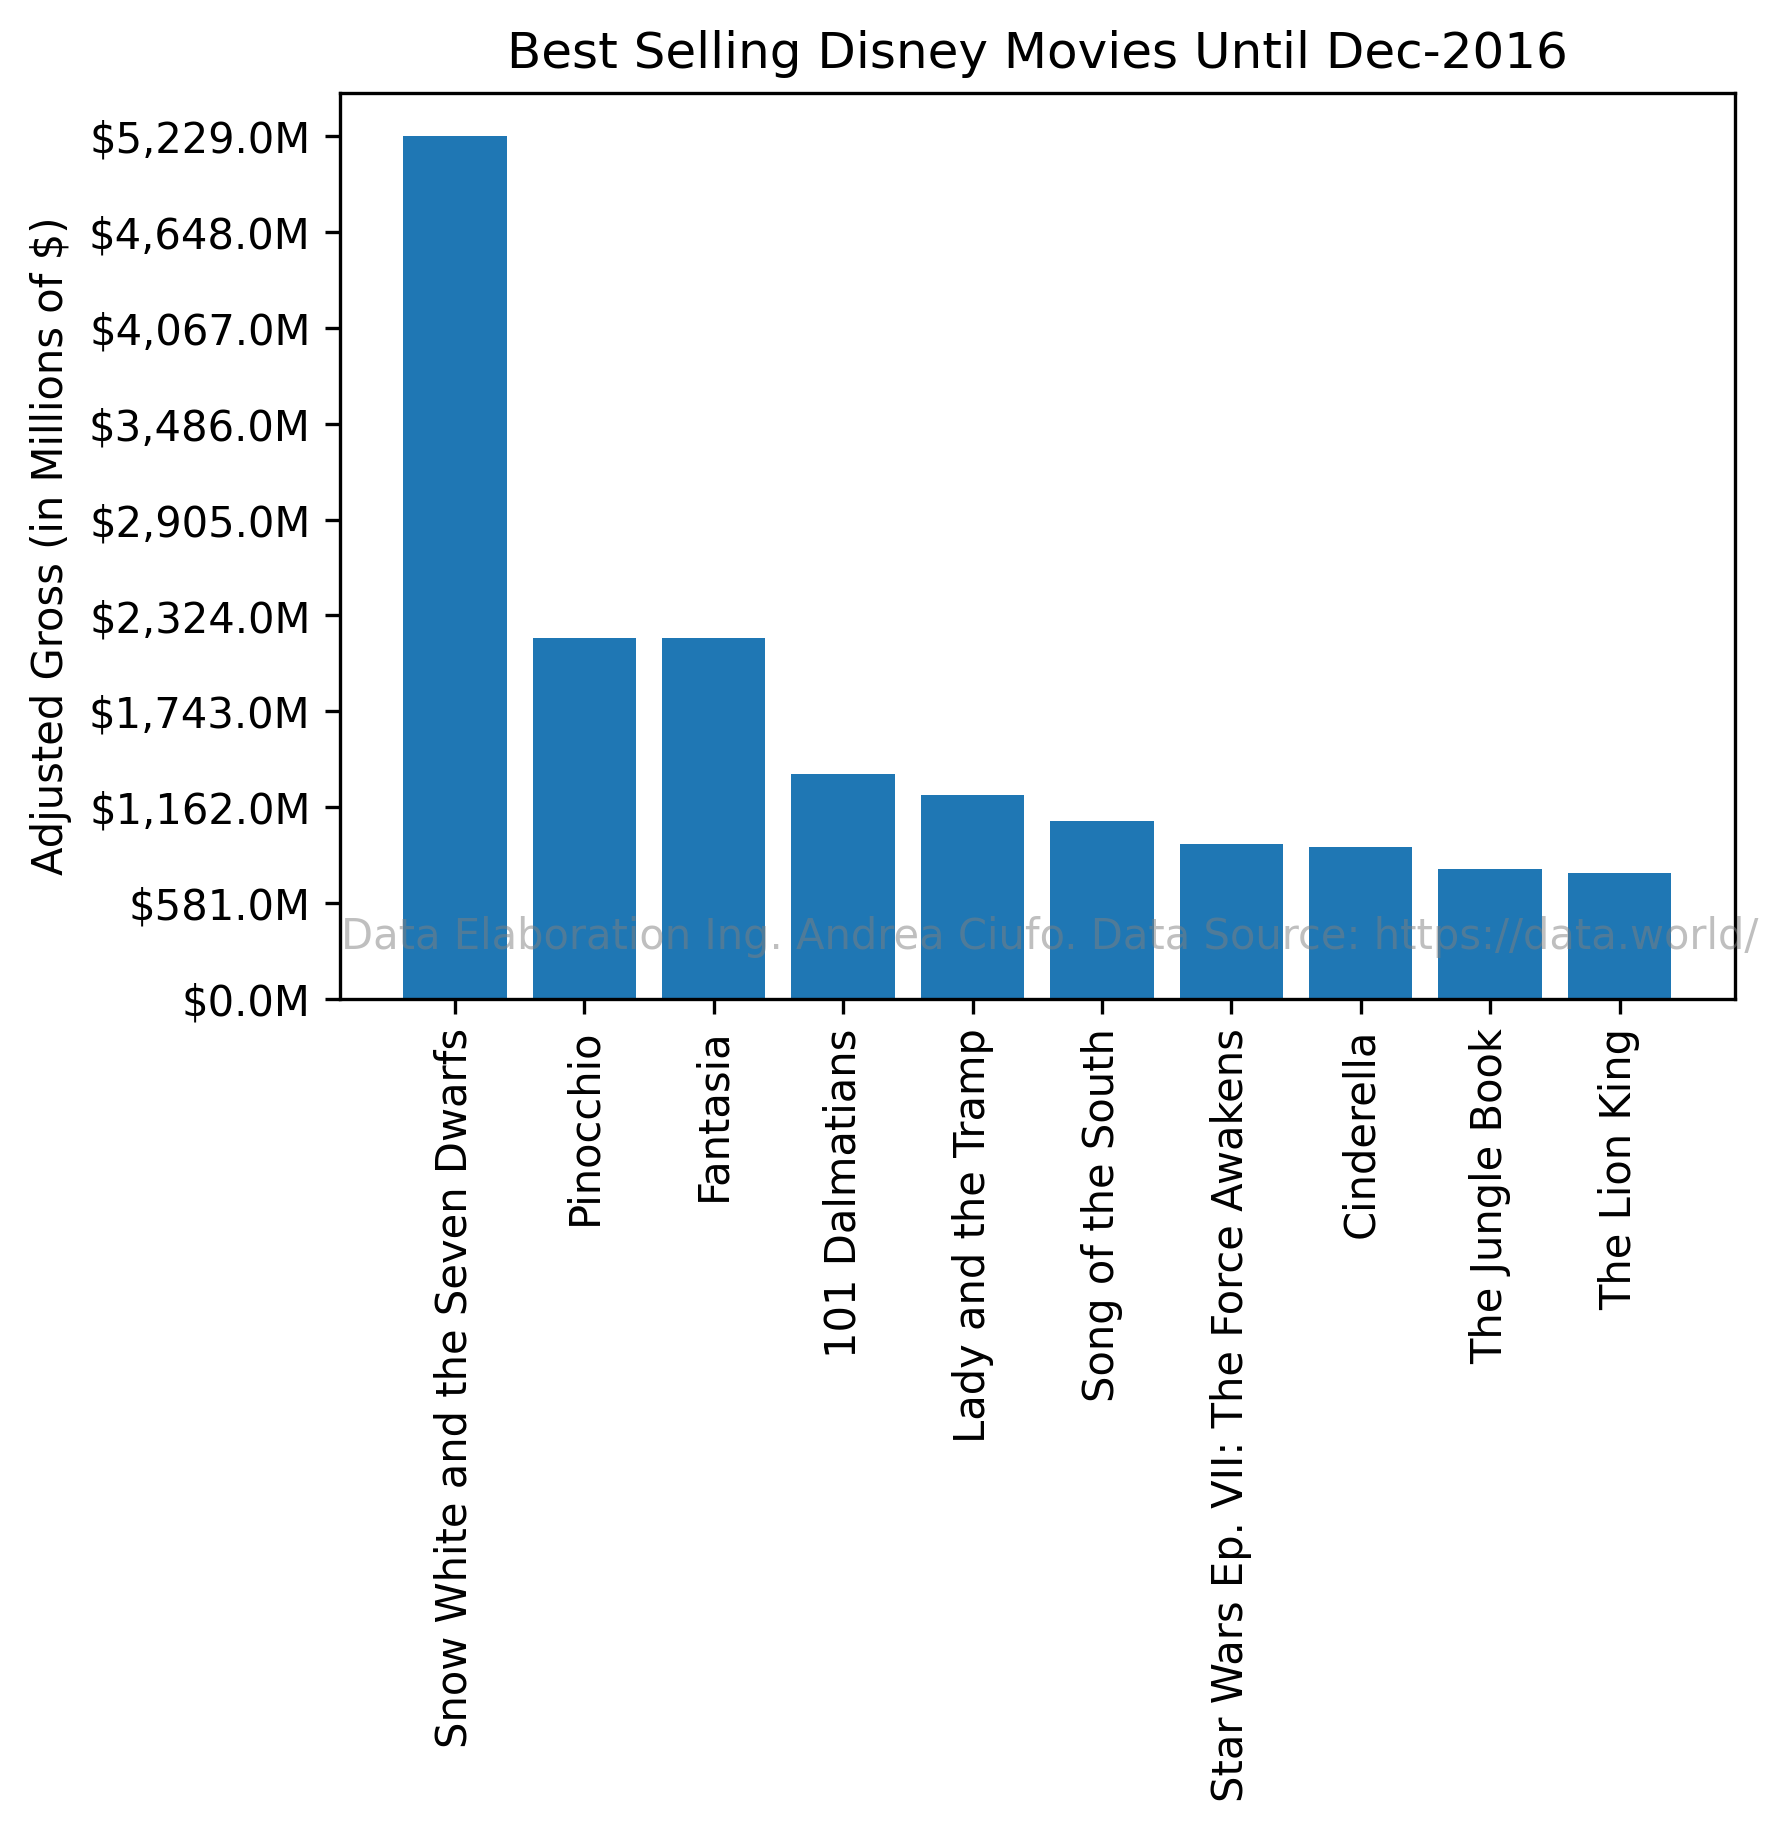

In [ ]:
#plotting best selling Disney movies
#I like to increase the default plot quality
#by increasing dpi 
fig, ax = plt.subplots(facecolor='white', dpi=300)
top_10_bs_film=df1.sort_values(by=["inflation_adjusted_gross"],ascending=False).head(10)
#saving the dataframe into an excel file 
to_excel=top_10_bs_film.to_excel("bestfilm.xlsx")
y=top_10_bs_film.inflation_adjusted_gross
x=np.arange(0,len(y))
y_labels=np.linspace(0,max(y),10,dtype=int)
#formatting the y axis and 
#showing revenues based on millions
y_bar_labels=['${:,.1f}'.format(x) +'M' for x in y_labels/1000000]
labels=top_10_bs_film.movie_title
movie_bar = ax.bar(x,y)
# Add text for labels, title and custom x-axis and y-axis tick labels
ax.set_ylabel('Adjusted Gross (in Millions of $)')
ax.set_title('Best Selling Disney Movies Until Dec-2016')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.set_yticks(y_labels)
ax.set_yticklabels(y_bar_labels)
plt.text(4.6, 500000000, 'Data Elaboration Ing. Andrea Ciufo. Data Source: https://data.world/',
         fontsize=10, color='gray',
         ha='center', va='top', alpha=0.5)
plt.show()

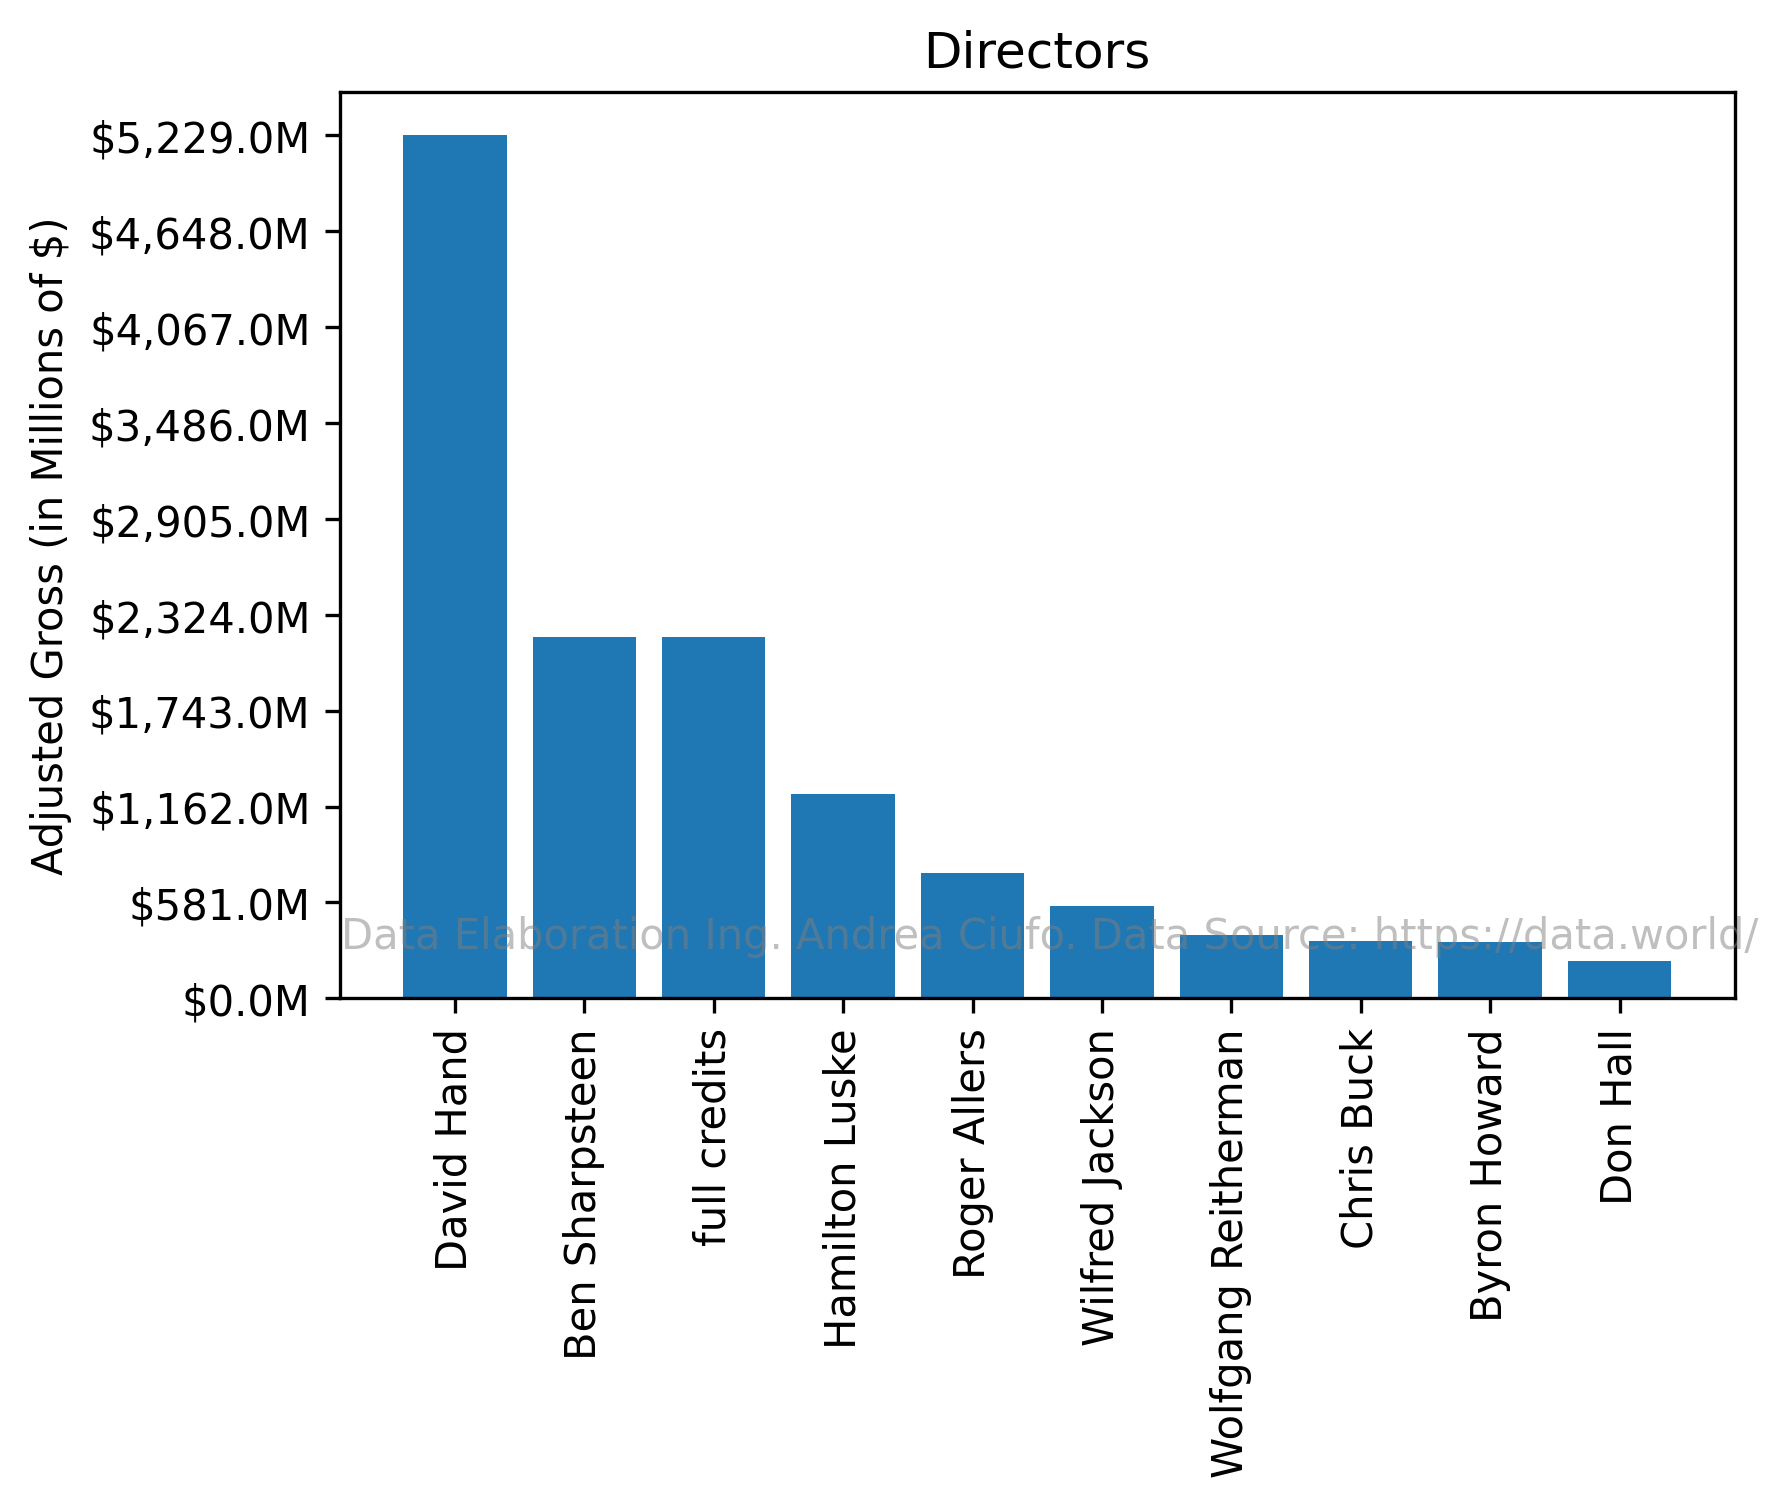

In [ ]:
#plotting best selling Disney movies directors
#I like to increase the default plot quality
#by increasing dpi 
fig, ax = plt.subplots(facecolor='white', dpi=300)
y=top10_dir_absolute.inflation_adjusted_gross
to_excel=top10_dir_absolute.to_excel("bestdirectors.xlsx")
x=np.arange(0,len(top10_dir_absolute.director))
labels=top10_dir_absolute.director

y_labels=np.linspace(0,max(y),10,dtype=int)
#formatting the y axis and 
#showing revenues based on millions
y_bar_labels=['${:,.1f}'.format(x) +'M' for x in y_labels/1000000]

director_bar = ax.bar(x,y)
# Add text for labels, title and custom x-axis and y-axis tick labels
ax.set_ylabel('Adjusted Gross (in Millions of $)')
ax.set_title('Directors')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.set_yticks(y_labels)
ax.set_yticklabels(y_bar_labels)
#applying a watermark on the plot 
plt.text(4.6, 500000000, 'Data Elaboration Ing. Andrea Ciufo. Data Source: https://data.world/',
         fontsize=10, color='gray',
         ha='center', va='top', alpha=0.5)

plt.show()
#top 10 most successful directors based on the average of their movies
